In [1]:

# import basic modules
import sys
import os
import time
import numpy as np
from tqdm import tqdm
import gc
import torch
import argparse
import skimage.transform

# import custom modules
code_dir = '/user_data/mmhender/imStat/code/'
sys.path.append(code_dir)
from feature_extraction import texture_statistics_gabor, bdcn_features, sketch_token_features
from feature_extraction import texture_statistics_pyramid, alexnet_features
from utils import nsd_utils, roi_utils, default_paths

from model_fitting import initialize_fitting as initialize_fitting
from model_fitting import arg_parser as arg_parser
from model_fitting import merge_features, fwrf_fit, fwrf_predict, reconstruct

fpX = np.float32
# device = initialize_fitting.init_cuda()
device = 'cpu:0'
# device = initialize_fitting.init_cuda()

In [236]:
Y

array([[-0.55      , -0.55      , -0.55      , -0.55      , -0.55      ,
        -0.55      , -0.55      ],
       [-0.36666667, -0.36666667, -0.36666667, -0.36666667, -0.36666667,
        -0.36666667, -0.36666667],
       [-0.18333333, -0.18333333, -0.18333333, -0.18333333, -0.18333333,
        -0.18333333, -0.18333333],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.18333333,  0.18333333,  0.18333333,  0.18333333,  0.18333333,
         0.18333333,  0.18333333],
       [ 0.36666667,  0.36666667,  0.36666667,  0.36666667,  0.36666667,
         0.36666667,  0.36666667],
       [ 0.55      ,  0.55      ,  0.55      ,  0.55      ,  0.55      ,
         0.55      ,  0.55      ]])

In [217]:
int(np.ceil(aperture/(s * min_spacing)))

20

1.0

In [94]:
out2 =torch.load('/user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Oct-19-2021_1224_16/all_fit_params')
                  

In [96]:
counts2 = np.array([np.sum(out2['best_params'][5][:,0]==mm) for mm in range(875)])
print(np.where(counts2==0))
badmodels2 = np.where(counts2==0)
print(np.argmax(counts2))
# prf_models[counts==0,:]
prf_models[np.argmax(counts2),:]

(array([ 23, 735, 809]),)
866


array([0.        , 0.        , 0.28787428])

In [99]:
bm1 = out['best_params'][5][:,0]
bm2 = out2['best_params'][5][:,0]

In [103]:
np.sum((bm1==866) & (bm2!=866))

4373

In [105]:
changed = (bm1==866) & (bm2!=866)

In [119]:
vinds_changed = np.where(changed)[0]
vinds_changed

array([    0,     2,     5, ..., 19730, 19731, 19732])

Text(0, 0.5, 'ST')

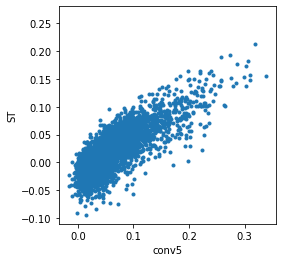

In [168]:
rsq1 = out['val_r2'][changed,0]
rsq2 = out2['val_r2'][changed,0]

plt.figure();
plt.plot(rsq1, rsq2, '.')
plt.axis('square')
plt.xlabel('conv5')
plt.ylabel('ST')

In [177]:
np.flip(np.argsort(rsq1))[1]


391

In [179]:
np.where(changed)[0][391]

907

In [180]:
bm1[907]

866

In [182]:
bm2[907]

825

In [183]:
prf_models[825,:]

array([ 0.11      , -0.11      ,  0.14910375])

In [123]:
np.flip(np.argsort(out['val_r2'][vinds_changed,0]))

array([3374,  391, 4148, ..., 3977, 3452, 3451])

In [133]:
np.flip(np.argsort(out2['val_r2'][vinds_changed,0]))

array([ 391, 1835,  397, ...,  260, 4303, 2334])

In [128]:
vind = vinds_changed[3374]

In [134]:
vind = vinds_changed[391]

In [126]:
out['val_r2'][vinds_changed[[3374, 391, 4148]],0]

array([0.3389395 , 0.31804055, 0.30984104], dtype=float32)

In [135]:
out2['val_r2'][vind,0]

0.21275757

In [130]:
out['best_params'][5][vind]

array([866])

In [131]:
out2['best_params'][5][vind]

array([855])

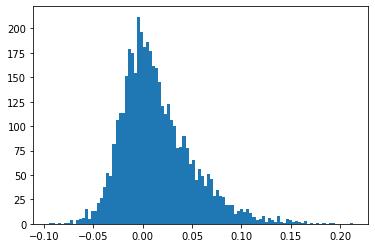

In [109]:
plt.figure();
plt.hist(out2['val_r2'][changed,0], 100);

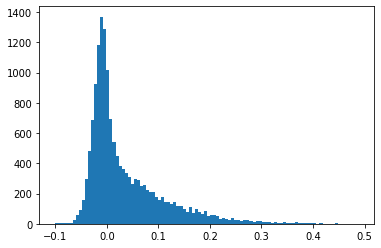

In [112]:
plt.figure();
plt.hist(out2['val_r2'][changed==0,0], 100);

In [4]:
out = torch.load('/user_data/mmhender/imStat/model_fits/S01/alexnet_Conv5/Oct-22-2021_1919_16/all_fit_params')


In [7]:
prf_pars = out['best_params'][0][:,0,:]
zeros = (prf_pars[:,0]==0.0) & (prf_pars[:,1]==0.0)
bad = np.where((prf_pars[:,0]==0.0) & (prf_pars[:,1]==0.0))[0]
bad

array([    0,     2,     4, ..., 19732, 19736, 19737])

In [11]:
counts = np.array([np.sum(out['best_params'][5][:,0]==mm) for mm in range(875)])
print(np.where(counts==0))
badmodels = np.where(counts==0)
print(np.argmax(counts))
# prf_models[counts==0,:]
prf_models[np.argmax(counts),:]

(array([ 21,  23,  32,  38, 357, 358, 361, 377, 378, 414, 416, 417, 428,
       439, 445, 518, 578, 592, 595, 596, 605, 609, 611, 620, 624, 635,
       690, 733, 734, 743]),)
866


array([0.        , 0.        , 0.28787428])

In [104]:
counts[866]

5693

In [60]:
np.unique(prf_models[:,2])

array([0.04      , 0.05557982, 0.07722791, 0.10730783, 0.14910375,
       0.207179  , 0.28787428, 0.40000001])

In [152]:
prf_models[np.where(np.round(prf_models[:,2],2)==0.40)[0],:]

array([[-0.55      , -0.55      ,  0.40000001],
       [ 0.55      , -0.55      ,  0.40000001],
       [-0.55      ,  0.55      ,  0.40000001],
       [ 0.55      ,  0.55      ,  0.40000001]])

In [153]:
np.where(np.round(prf_models[:,2],2)==0.40)[0]

array([871, 872, 873, 874])

In [150]:
np.where((np.round(prf_models[:,1],2)==0.00) & (np.round(prf_models[:,2],2)==0.40) & \
             (np.round(prf_models[:,0],2)==0.00))

(array([], dtype=int64),)

In [66]:
prf_models[(np.round(prf_models[:,1],2)==0.00) & (np.round(prf_models[:,0],2)==0.00),:]

array([[0.        , 0.        , 0.05557982],
       [0.        , 0.        , 0.07722791],
       [0.        , 0.        , 0.28787428]])

In [74]:
prf_models[(np.round(prf_models[:,2],2)==0.21),:]

array([[-0.55      , -0.55      ,  0.207179  ],
       [-0.18333333, -0.55      ,  0.207179  ],
       [ 0.18333333, -0.55      ,  0.207179  ],
       [ 0.55      , -0.55      ,  0.207179  ],
       [-0.55      , -0.18333333,  0.207179  ],
       [-0.18333333, -0.18333333,  0.207179  ],
       [ 0.18333333, -0.18333333,  0.207179  ],
       [ 0.55      , -0.18333333,  0.207179  ],
       [-0.55      ,  0.18333333,  0.207179  ],
       [-0.18333333,  0.18333333,  0.207179  ],
       [ 0.18333333,  0.18333333,  0.207179  ],
       [ 0.55      ,  0.18333333,  0.207179  ],
       [-0.55      ,  0.55      ,  0.207179  ],
       [-0.18333333,  0.55      ,  0.207179  ],
       [ 0.18333333,  0.55      ,  0.207179  ],
       [ 0.55      ,  0.55      ,  0.207179  ]])

In [75]:
np.where((np.round(prf_models[:,2],2)==0.21))

(array([846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858,
        859, 860, 861]),)

In [76]:
prf_models[851,:]

array([-0.18333333, -0.18333333,  0.207179  ])

In [77]:
counts[851]

276

In [84]:
prf_models[np.flip(np.argsort(counts))[0:10]]

array([[ 0.        ,  0.        ,  0.28787428],
       [-0.18333333,  0.18333333,  0.207179  ],
       [ 0.18333333,  0.18333333,  0.207179  ],
       [ 0.18333333, -0.18333333,  0.207179  ],
       [ 0.11      ,  0.11      ,  0.14910375],
       [-0.18333333, -0.18333333,  0.207179  ],
       [-0.11      ,  0.11      ,  0.14910375],
       [ 0.55      ,  0.        ,  0.28787428],
       [-0.55      ,  0.        ,  0.28787428],
       [ 0.11      , -0.11      ,  0.14910375]])

In [85]:
np.flip(np.argsort(counts))[0:10]

array([866, 855, 856, 852, 831, 851, 830, 867, 865, 825])

In [143]:
prf_models[np.argsort(counts)[0:10]]

array([[ 0.39285714,  0.39285714,  0.05557982],
       [ 0.55      , -0.55      ,  0.05557982],
       [-0.49210526, -0.49210526,  0.04      ],
       [-0.47142857,  0.47142857,  0.05557982],
       [-0.37631579, -0.49210526,  0.04      ],
       [-0.55      ,  0.47142857,  0.05557982],
       [ 0.43421053,  0.49210526,  0.04      ],
       [ 0.47142857,  0.        ,  0.05557982],
       [-0.49210526,  0.49210526,  0.04      ],
       [ 0.55      ,  0.        ,  0.07722791]])

In [144]:
np.argsort(counts)[0:10]

array([592, 414,  21, 596,  23, 595, 377, 518, 361, 690])

In [86]:
counts[867]

251

In [87]:
prf_models[867]

array([0.55      , 0.        , 0.28787428])

In [261]:
subject = 1
debug = True
use_node_storage = False

device = initialize_fitting.init_cuda()

if use_node_storage:
    alexnet_feat_path = default_paths.alexnet_feat_path_localnode
else:
    alexnet_feat_path = default_paths.alexnet_feat_path

# Load and prepare the image set to work with (all images for the current subject, 10,000 ims)
stim_root = default_paths.stim_root
image_data = nsd_utils.get_image_data(subject)  
image_data = nsd_utils.image_uncolorize_fn(image_data)

n_images = image_data.shape[0]

# Params for the spatial aspect of the model (possible pRFs)
aperture = 1.0
aperture_rf_range = 1.1
aperture, prf_models = get_prf_models(aperture_rf_range=aperture_rf_range, orig_grid=False)    
# aperture, prf_models = get_prf_models2(aperture_rf_range=aperture_rf_range)    

# Fix these params
n_prf_sd_out = 2
batch_size = 100
mult_patch_by_prf = True
do_avg_pool = True

layers_to_return = ['Conv1_ReLU', 'Conv2_ReLU','Conv3_ReLU','Conv4_ReLU','Conv5_ReLU']
n_layers = len(layers_to_return)
layer_inds = [ll for ll in range(len(alexnet_layer_names)) \
                  if alexnet_layer_names[ll] in layers_to_return]

n_prfs = len(prf_models)
features_each_prf = [np.zeros((n_images, n_features_each_layer[ll], n_prfs),dtype=dtype) for ll in layer_inds]

batch_size=100    
n_batches = int(np.ceil(n_images/batch_size))


#device: 1
device#: 0
device name: GeForce GTX TITAN X

torch: 1.8.1+cu111
cuda:  11.1
cudnn: 8005
dtype: torch.float32

Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255
number of pRFs: 961
most extreme RF positions:
[-0.55 -0.55  0.04]
[0. 0. 1.]


In [ ]:
features_each_prf[4].shape

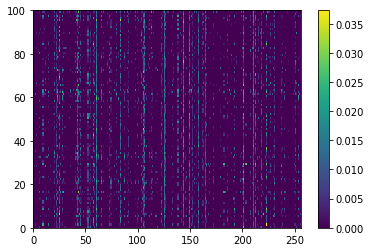

In [21]:
import matplotlib.pyplot as plt
plt.figure();
plt.pcolormesh(features_each_prf[4][batch_inds,:,1])
plt.colorbar()

In [12]:
bb = 0
debug = True

batch_inds = np.arange(batch_size * bb, np.min([batch_size * (bb+1), n_images]))

# using grayscale images for better comparison w my other models.
# need to tile to 3 so alexnet weights will be right size
image_batch = np.tile(image_data[batch_inds,:,:,:], [1,3,1,1])

activ_batch = get_alexnet_activations_batch(image_batch, layer_inds, device=device)

In [262]:
ll = 4

# for ll in range(n_layers):

print('Getting prf-specific activations for layer %s'%alexnet_layer_names[layer_inds[ll]])

maps_full_field = torch.moveaxis(activ_batch[ll], [0,1,2,3], [0,3,1,2])

# mm = 866

# mm = 871
# mm = 825
# mm = 855
# mm = 592
# mm = 21
mm = 960
# mm = 866
#     for mm in range(n_prfs):

#         if debug and mm>1:
#             continue

prf_params = prf_models[mm,:]
x,y,sigma = prf_params
print('Getting features for pRF [x,y,sigma]:')
print([x,y,sigma])
n_pix = maps_full_field.shape[1]

 # Define the RF for this "model" version
prf = torch_utils._to_torch(prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                          dtype=np.float32)[2], device=device)
minval = torch.min(prf)
maxval = torch.max(prf-minval)
prf_scaled = (prf - minval)/maxval

if mult_patch_by_prf:
    # This effectively restricts the spatial location, so no need to crop
    maps = maps_full_field * prf_scaled.view([1,n_pix, n_pix,1])
else:
    # This is a coarser way of choosing which spatial region to look at
    # Crop the patch +/- n SD away from center
    n_pf_sd_out = 2
    bbox = texture_utils.get_bbox_from_prf(prf_params, prf.shape, n_prf_sd_out, \
                                   min_pix=None, verbose=False, force_square=False)
    print('bbox to crop is:')
    print(bbox)
    maps = maps_full_field[:,bbox[0]:bbox[1], bbox[2]:bbox[3],:]

if do_avg_pool:
    features_batch = torch.mean(maps, dim=(1,2))
else:
    features_batch = torch.max(maps, dim=(1,2))

print('model %d, min/max of features in batch: [%s, %s]'%(mm, \
                              torch.min(features_batch), torch.max(features_batch))) 

features_each_prf[ll][batch_inds,:,mm] = torch_utils.get_value(features_batch)

Getting prf-specific activations for layer Conv5_ReLU
Getting features for pRF [x,y,sigma]:
[0.0, 0.0, 1.0]
model 960, min/max of features in batch: [tensor(0., device='cuda:0', grad_fn=<MinBackward1>), tensor(1.6445, device='cuda:0', grad_fn=<MaxBackward1>)]


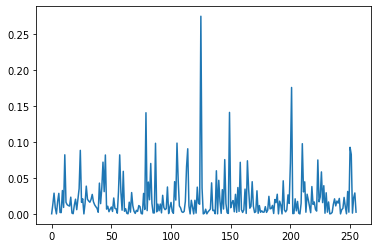

In [198]:
plt.figure();
fb1 = features_batch.detach().cpu().numpy()
plt.plot(np.mean(fb1, axis=0))

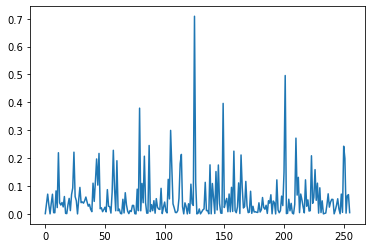

In [201]:
plt.figure();
fb2 = features_batch.detach().cpu().numpy()
plt.plot(np.mean(fb2, axis=0))

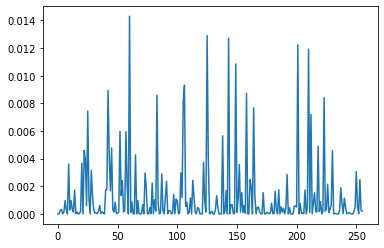

In [203]:
plt.figure();
fb3 = features_batch.detach().cpu().numpy()
plt.plot(np.mean(fb3, axis=0))

In [264]:
fullmaps = maps_full_field.detach().cpu().numpy()

p = prf_scaled.detach().cpu().numpy()


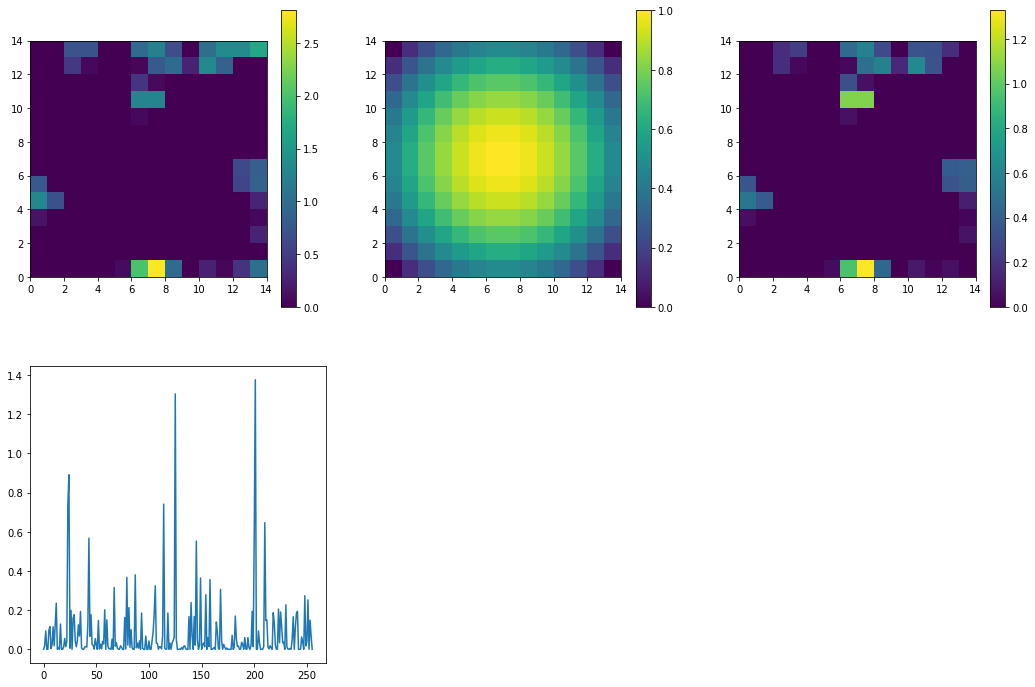

In [265]:
plt.figure(figsize=(18,12))
ii = 50
ff = 113
plt.subplot(2,3,1)
plt.pcolormesh(fullmaps[ii,:,:,ff])
plt.colorbar()
plt.axis('square')

plt.subplot(2,3,2);
plt.pcolormesh(p);
plt.colorbar()
plt.axis('square')

plt.subplot(2,3,3);
plt.pcolormesh(fullmaps[ii,:,:,ff] * p);
plt.colorbar()
plt.axis('square')



plt.subplot(2,3,4)
vals = features_each_prf[ll][ii,:,mm]
plt.plot(vals);

In [189]:
np.argmax(vals)

125

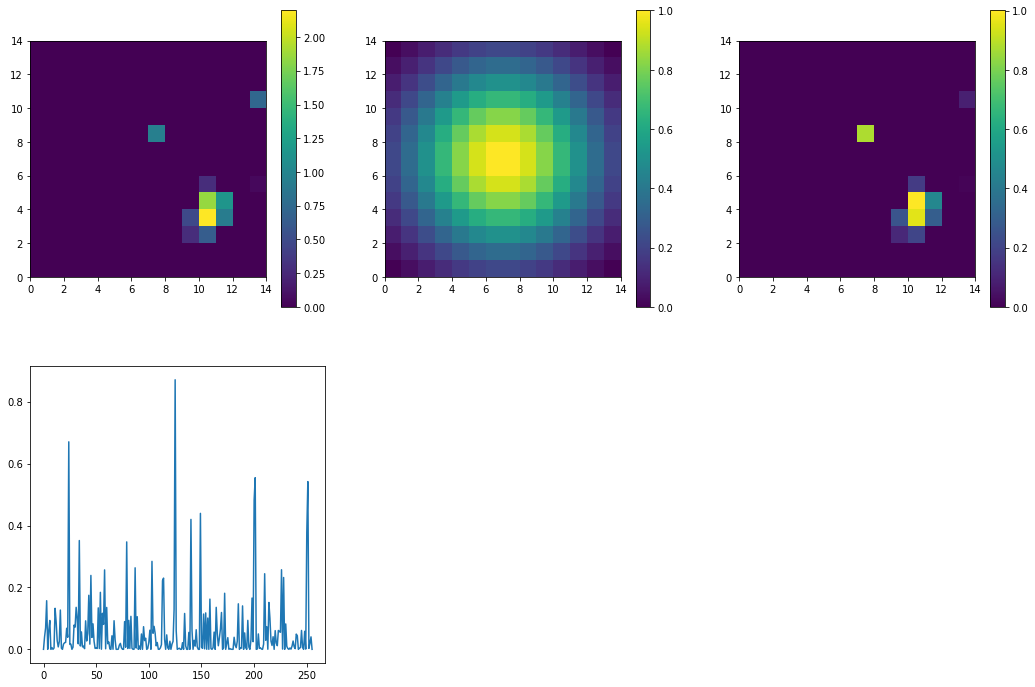

In [43]:
plt.figure(figsize=(18,12))
plt.subplot(2,3,1)
plt.pcolormesh(fullmaps[0,:,:,100])
plt.colorbar()
plt.axis('square')

plt.subplot(2,3,2);
plt.pcolormesh(p);
plt.colorbar()
plt.axis('square')

plt.subplot(2,3,3);
plt.pcolormesh(fullmaps[0,:,:,100] * p);
plt.colorbar()
plt.axis('square')



plt.subplot(2,3,4)
vals = features_each_prf[ll][0,:,mm]
plt.plot(vals);

In [2]:
import numpy as np
import sys, os
import argparse
import torch
import time
import h5py
import copy
import torchvision.models as models
import torch.nn as nn

#import custom modules
code_dir = '/user_data/mmhender/imStat/code/'
sys.path.append(code_dir)
from utils import prf_utils, torch_utils, texture_utils, default_paths, nsd_utils
from model_fitting import initialize_fitting


dtype=np.float32

# Define sets of alexnet layers
alexnet_conv_layer_names = ['Conv1','Conv1_ReLU','Conv1_MaxPool', \
                       'Conv2','Conv2_ReLU','Conv2_MaxPool', \
                       'Conv3','Conv3_ReLU', \
                       'Conv4','Conv4_ReLU', \
                       'Conv5','Conv5_ReLU','Conv5_MaxPool']

alexnet_fc_layer_names = ['Dropout6','FC6','FC6_ReLU','Dropout7','FC7','FC7_ReLU','FC8']

n_feature_layers = len(alexnet_conv_layer_names)
n_classif_layers = len(alexnet_fc_layer_names)
n_total_layers = n_feature_layers + n_classif_layers
alexnet_layer_names = copy.deepcopy(alexnet_conv_layer_names)
alexnet_layer_names.extend(alexnet_fc_layer_names)

n_features_each_layer = [64,64,64, 192,192,192, 384,384, 256,256, 256,256]

def get_features_each_prf(subject, use_node_storage=False, debug=False):
    """
    Extract the portion of CNN feature maps corresponding to pRF defined in "models"
    Return list of the features in each pRF, for each layer of interest.
    """
    
    device = initialize_fitting.init_cuda()
    
    if use_node_storage:
        alexnet_feat_path = default_paths.alexnet_feat_path_localnode
    else:
        alexnet_feat_path = default_paths.alexnet_feat_path

    # Load and prepare the image set to work with (all images for the current subject, 10,000 ims)
    stim_root = default_paths.stim_root
    image_data = nsd_utils.get_image_data(subject)  
    image_data = nsd_utils.image_uncolorize_fn(image_data)
   
    n_images = image_data.shape[0]
    
    # Params for the spatial aspect of the model (possible pRFs)
    aperture = 1.0
    aperture_rf_range = 1.1
    aperture, prf_models = initialize_fitting.get_prf_models(aperture_rf_range=aperture_rf_range)    

    # Fix these params
    n_prf_sd_out = 2
    batch_size = 100
    mult_patch_by_prf = True
    do_avg_pool = True
    
    layers_to_return = ['Conv1_ReLU', 'Conv2_ReLU','Conv3_ReLU','Conv4_ReLU','Conv5_ReLU']
    n_layers = len(layers_to_return)
    layer_inds = [ll for ll in range(len(alexnet_layer_names)) \
                      if alexnet_layer_names[ll] in layers_to_return]

    n_prfs = len(prf_models)
    features_each_prf = [np.zeros((n_images, n_features_each_layer[ll], n_prfs),dtype=dtype) for ll in layer_inds]

    batch_size=100    
    n_batches = int(np.ceil(n_images/batch_size))

    with torch.no_grad():

        for bb in range(n_batches):

            if debug and bb>1:
                continue
            print('Processing images for batch %d of %d'%(bb, n_batches))

            batch_inds = np.arange(batch_size * bb, np.min([batch_size * (bb+1), n_images]))

            # using grayscale images for better comparison w my other models.
            # need to tile to 3 so alexnet weights will be right size
            image_batch = np.tile(image_data[batch_inds,:,:,:], [1,3,1,1])


            activ_batch = get_alexnet_activations_batch(image_batch, layer_inds, device=device)

            for ll in range(n_layers):

                print('Getting prf-specific activations for layer %s'%alexnet_layer_names[layer_inds[ll]])

                maps_full_field = torch.moveaxis(activ_batch[ll], [0,1,2,3], [0,3,1,2])

                for mm in range(n_prfs):

                    if debug and mm>1:
                        continue

                    prf_params = prf_models[mm,:]
                    x,y,sigma = prf_params
                    print('Getting features for pRF [x,y,sigma]:')
                    print([x,y,sigma])
                    n_pix = maps_full_field.shape[1]

                     # Define the RF for this "model" version
                    prf = torch_utils._to_torch(prf_utils.make_gaussian_mass(x, y, sigma, n_pix, size=aperture, \
                                              dtype=np.float32)[2], device=device)
                    minval = torch.min(prf)
                    maxval = torch.max(prf-minval)
                    prf_scaled = (prf - minval)/maxval

                    if mult_patch_by_prf:
                        # This effectively restricts the spatial location, so no need to crop
                        maps = maps_full_field * prf_scaled.view([1,n_pix, n_pix,1])
                    else:
                        # This is a coarser way of choosing which spatial region to look at
                        # Crop the patch +/- n SD away from center
                        n_pf_sd_out = 2
                        bbox = texture_utils.get_bbox_from_prf(prf_params, prf.shape, n_prf_sd_out, \
                                                       min_pix=None, verbose=False, force_square=False)
                        print('bbox to crop is:')
                        print(bbox)
                        maps = maps_full_field[:,bbox[0]:bbox[1], bbox[2]:bbox[3],:]

                    if do_avg_pool:
                        features_batch = torch.mean(maps, dim=(1,2))
                    else:
                        features_batch = torch.max(maps, dim=(1,2))

                    print('model %d, min/max of features in batch: [%s, %s]'%(mm, \
                                                  torch.min(features_batch), torch.max(features_batch))) 

                    features_each_prf[ll][batch_inds,:,mm] = torch_utils.get_value(features_batch)

        # Now save the results, one file for each alexnet layer 
        for ii, ll in enumerate(layer_inds):
            fn2save = os.path.join(alexnet_feat_path, 'S%d_%s_features_each_prf.h5py'%(subject, alexnet_layer_names[ll]))
            print('Writing prf features to %s\n'%fn2save)

            t = time.time()
            with h5py.File(fn2save, 'w') as data_set:
                dset = data_set.create_dataset("features", np.shape(features_each_prf[ii]), dtype=np.float64)
                data_set['/features'][:,:,:] = features_each_prf[ii]
                data_set.close()  
            elapsed = time.time() - t

            print('Took %.5f sec to write file'%elapsed)


def get_alexnet_activations_batch(image_batch, layer_inds, device=None):

    """
    Get activations for images in NSD, passed through pretrained AlexNet.
    Specify which NSD images to look at, and which layers to return.
    """

    if device is None:
        device = torch.device('cpu:0')
       
    # first loading pre-trained model from torch model zoo
    model = models.alexnet(pretrained=True).float().to(device)
    model.eval()
    model_name='AlexNet'

    is_fc = [('FC' in alexnet_layer_names[ll] or 'fc' in alexnet_layer_names[ll]) for ll in layer_inds]
    
    if len(layer_inds)==0:
        raise ValueError('your layer names do not match any of those specified in alexnet_features.py')

    
    # first making this subfunction that is needed to get the activation on a forward pass
    def get_activ_fwd_hook(ii,ll):
        def hook(self, input, output):            
            print('hook for %s'%alexnet_layer_names[ll])           
            activ[ii] = output
            print(output.shape)
        return hook
   
    # get image and labels for this batch
    # image_tensors is [batch_size x 3 x 224 x 224]
    image_tensors =  torch_utils._to_torch(image_batch, device=device).float()
    activ = [[] for ll in layer_inds]
    hook = [[] for ll in layer_inds]
    
    model.eval()

    # adding this "hook" to the module corresponding to each layer, so we'll save activations at each layer
    # this only modifies the "graph" e.g. what the model code does when run, but doesn't actually run it yet.
    for ii, ll in enumerate(layer_inds):
        if not is_fc[ii]:
            h = model.features[ll].register_forward_hook(get_activ_fwd_hook(ii,ll))
        else:
            h = model.classifier[ll-n_feature_layers].register_forward_hook(get_activ_fwd_hook(ii,ll))
        hook[ii] = h

    # do the forward pass of model, which now includes the forward hooks
    # now the "activ" variable will get modified, because it gets altered during the hook function
    model(image_tensors)
    
    # Now remove all the hooks
    for ii, ll in enumerate(layer_inds):
        print(activ[ii].shape)
        hook[ii].remove

    return activ
